In [1]:
#Libraries

## Dataframes 
import pandas as pd 
import numpy as np 

## Split Data
from sklearn.model_selection import train_test_split

## Reporting
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

## Normalize Data 
from sklearn.preprocessing import StandardScaler

## Logistic Regression
from sklearn.linear_model import LogisticRegression 

## Random Forest
from sklearn.ensemble import RandomForestClassifier 

## SVM 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Neural Network 
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf 

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.callbacks import EarlyStopping

# Import Data

In [2]:
darwin = pd.read_csv("darwin2.csv")
darwin.head()

,ID,air_time3,disp_index3,gmrt_in_air3,gmrt_on_paper3,max_x_extension3,max_y_extension3,mean_acc_in_air3,mean_acc_on_paper3,mean_gmrt3,...,mean_jerk_in_air18,mean_jerk_on_paper18,mean_speed_in_air18,mean_speed_on_paper18,num_of_pendown18,paper_time18,pressure_mean18,pressure_var18,total_time18,class
0,id_1,4345,0.000013,330.487573,106.611229,4495,765,0.692386,0.178768,218.549401,...,0.032739,0.021847,2.122297,3.446748,3,1990,1766.065327,250250.39270,3320,P
1,id_2,15885,0.000013,240.382372,107.648180,4498,2386,0.890156,0.133220,174.015276,...,0.023843,0.017654,1.739891,0.908762,6,6310,1657.667987,267168.18060,8815,P
2,id_3,420,0.000009,82.562392,146.116295,4645,266,0.202899,0.102299,114.339344,...,0.027656,0.017302,1.470192,2.933225,4,2100,1840.950000,113069.76180,2625,P
3,id_4,3795,0.000014,323.273194,75.711596,4568,966,0.268581,0.132872,199.492395,...,0.401766,0.018004,7.782790,2.600172,6,2820,1473.060284,340721.07080,5935,P
4,id_5,2255,0.000012,214.958135,70.517185,4076,317,0.233940,0.157008,142.737660,...,0.032314,0.016255,3.123961,2.268141,4,2200,1974.238636,74065.03169,3235,P


**Encode Data**

In [3]:
# Let P = 1 & H = 0
def switch(alz):
    if alz == 'P':
        return 1
    else:
        return 0

In [4]:
# Apply function 'switch' to the 'class' column
darwin['class'] = darwin['class'].apply(switch)

In [5]:
# Verify the change 
darwin['class'].unique()

array([1, 0])

**Split Data**

In [6]:
#Split the data 
#Set test data to 30% and random state to 101
X_train, X_test, y_train, y_test = train_test_split(darwin.drop(['ID', 'class'],axis=1),
                                                   darwin['class'],
                                                   test_size=0.3,
                                                   random_state=101)

**Normalize**

Allows features to share the same scale from 0-1 using a standard normal scale. ```StandardScaler()``` calculates the z-score in each column.

In [7]:
#Normalize
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Logistic Regression

**Hyperparameter(s)**

``C``: 0.001

In [8]:
#Create Logistic Regression instance lgm 
lgm = LogisticRegression(C=0.001, random_state = 101)

#Training
lgm.fit(X_train_std, y_train)

LogisticRegression(C=0.001, random_state=101)

In [9]:
#Predictions 
lgm_predict = lgm.predict(X_test_std)

In [11]:
#Model Evaluation
print("\n")
print(confusion_matrix(y_test, lgm_predict))
print('\n')
print(classification_report(y_test, lgm_predict))



[[20  7]
 [ 4 22]]


              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.76      0.85      0.80        26

    accuracy                           0.79        53
   macro avg       0.80      0.79      0.79        53
weighted avg       0.80      0.79      0.79        53



# Random Forest

**Hyperparameter(s)**

``n_estimators``: 300

``max_depth``: 10

``bootstrap``: False

In [12]:
#Create RandomForestClassifier instance rf
rf = RandomForestClassifier(n_estimators = 300, 
                           max_depth = 10,
                           bootstrap = False,
                           random_state = 101)

In [13]:
#Traning 
rf.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=300,
                       random_state=101)

In [14]:
#Predictions 
rf_pred = rf.predict(X_test_std)

In [15]:
#Model Evaluation
print(confusion_matrix(y_test, rf_pred))
print('\n')
print(classification_report(y_test, rf_pred))

[[25  2]
 [ 4 22]]


              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.92      0.85      0.88        26

    accuracy                           0.89        53
   macro avg       0.89      0.89      0.89        53
weighted avg       0.89      0.89      0.89        53



# Support Vector Classifier

**Hyperparameter(s)**

``kernel``: linear

``C``: 1

``gamma``: 0.5

In [16]:
#Create SVC instance svm 
svm = SVC(kernel="linear", C=1, gamma=0.5, random_state = 101)

#Training
svm.fit(X_train_std, y_train)

SVC(C=1, gamma=0.5, kernel='linear', random_state=101)

In [17]:
#Predictions
svm_predict = svm.predict(X_test_std)

In [18]:
#Model Evaluation 
print(confusion_matrix(y_test, svm_predict))
print('\n')
print(classification_report(y_test, svm_predict))

[[16 11]
 [ 3 23]]


              precision    recall  f1-score   support

           0       0.84      0.59      0.70        27
           1       0.68      0.88      0.77        26

    accuracy                           0.74        53
   macro avg       0.76      0.74      0.73        53
weighted avg       0.76      0.74      0.73        53



# Neural Network

In [20]:
# Set X and y to the values of columns we will use in train_test_split
X = darwin.drop(['class', 'ID'], axis=1).values
y = darwin['class'].values

In [21]:
#Split the data using X and y 
#Set test_size to 30% and random state to 101
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=101)

In [22]:
#Normalize 
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
#Look at the shape of X_train 
X_train.shape

(121, 90)

In [24]:
#Create Sequential instance neural_model
neural_model = Sequential()

#input layer
neural_model.add(Dense(units=90, activation='relu'))

#hidden layers- paper mentions 8 hidden layers
neural_model.add(Dense(units=80, activation='relu'))
neural_model.add(Dense(units=70, activation='relu'))
neural_model.add(Dense(units=60, activation='relu'))
neural_model.add(Dense(units=50, activation='relu'))
neural_model.add(Dense(units=40, activation='relu'))
neural_model.add(Dense(units=30, activation='relu'))
neural_model.add(Dense(units=20, activation='relu'))
neural_model.add(Dense(units=10, activation='relu'))

#output layer
neural_model.add(Dense(units=1, activation='sigmoid'))

In [25]:
#Binary classification 
neural_model.compile(loss='binary_crossentropy', optimizer='adam')

**Scenario 1:** Choosing too many epochs and overfitting

In [26]:
#Fit the model 
#Set epochs to 200
neural_model.fit(x = X_train,
                y = y_train,
                epochs = 200,
                validation_data = (X_test, y_test), 
                verbose = 1)

2024-02-08 13:34:55.459449: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-08 13:34:55.461278: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 121 samples, validate on 53 samples
Epoch 1/200
121/121 [==============================] - 1s 9ms/sample - loss: 0.6935 - val_loss: 0.6921
Epoch 2/200
121/121 [==============================] - 0s 485us/sample - loss: 0.6913 - val_loss: 0.6880
Epoch 3/200
121/121 [==============================] - 0s 468us/sample - loss: 0.6859 - val_loss: 0.6820
Epoch 4/200
121/121 [==============================] - 0s 482us/sample - loss: 0.6756 - val_loss: 0.6783
Epoch 5/200
121/121 [==============================] - 0s 477us/sample - loss: 0.6818 - val_loss: 0.6630
Epoch 6/200
121/121 [==============================] - 0s 434us/sample - loss: 0.6510 - val_loss: 0.6461
Epoch 7/200
121/121 [==============================] - 0s 448us/sample - loss: 0.6325 - val_loss: 0.6186
Epoch 8/200
121/121 [==============================] - 0s 426us/sample - loss: 0.5942 - val_loss: 0.5839
Epoch 9/200
121/121 [==============================] - 0s 459us/sample - loss: 0.5478 - val_loss: 0.5389
Epoch 10/200

Epoch 78/200
121/121 [==============================] - 0s 428us/sample - loss: 0.0237 - val_loss: 0.9296
Epoch 79/200
121/121 [==============================] - 0s 424us/sample - loss: 0.0144 - val_loss: 0.9108
Epoch 80/200
121/121 [==============================] - 0s 420us/sample - loss: 0.0118 - val_loss: 0.9706
Epoch 81/200
121/121 [==============================] - 0s 407us/sample - loss: 0.0113 - val_loss: 0.9481
Epoch 82/200
121/121 [==============================] - 0s 411us/sample - loss: 0.0063 - val_loss: 0.9764
Epoch 83/200
121/121 [==============================] - 0s 409us/sample - loss: 0.0057 - val_loss: 1.0364
Epoch 84/200
121/121 [==============================] - 0s 399us/sample - loss: 0.0038 - val_loss: 1.0233
Epoch 85/200
121/121 [==============================] - 0s 414us/sample - loss: 0.0033 - val_loss: 1.0411
Epoch 86/200
121/121 [==============================] - 0s 421us/sample - loss: 0.0026 - val_loss: 1.0629
Epoch 87/200
121/121 [========================

121/121 [==============================] - 0s 407us/sample - loss: 1.6624e-04 - val_loss: 1.4150
Epoch 153/200
121/121 [==============================] - 0s 419us/sample - loss: 1.6309e-04 - val_loss: 1.4180
Epoch 154/200
121/121 [==============================] - 0s 405us/sample - loss: 1.6048e-04 - val_loss: 1.4213
Epoch 155/200
121/121 [==============================] - 0s 418us/sample - loss: 1.5752e-04 - val_loss: 1.4228
Epoch 156/200
121/121 [==============================] - 0s 463us/sample - loss: 1.5473e-04 - val_loss: 1.4243
Epoch 157/200
121/121 [==============================] - 0s 520us/sample - loss: 1.5184e-04 - val_loss: 1.4272
Epoch 158/200
121/121 [==============================] - 0s 422us/sample - loss: 1.4888e-04 - val_loss: 1.4302
Epoch 159/200
121/121 [==============================] - 0s 467us/sample - loss: 1.4686e-04 - val_loss: 1.4318
Epoch 160/200
121/121 [==============================] - 0s 428us/sample - loss: 1.4388e-04 - val_loss: 1.4344
Epoch 161/200
1

<AxesSubplot:>

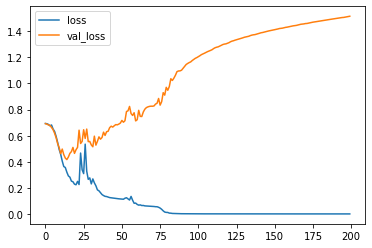

In [27]:
#Plot val_loss and loss 
neural_model_loss = pd.DataFrame(neural_model.history.history)
neural_model_loss.plot()

---
**Disclaimer:** The val_loss references the test data. The test data was used for validation instead of reserving a subset of the training data for validation.

- The loss in the test data is very close to the training data loss for the first 35 epochs. Afterwards, the loss increases to at most 1.4

- The goal is to decrease the error in the test data. This will be visible by a shorter space between the training loss (loss) and test loss (val_loss).

---

**Senario 2:** Early Stopping

In [28]:
#Create Sequential instance neural_model
neural_model = Sequential()

#input layer
neural_model.add(Dense(units=90, activation='relu'))

#hidden layers
neural_model.add(Dense(units=80, activation='relu'))
neural_model.add(Dense(units=70, activation='relu'))
neural_model.add(Dense(units=60, activation='relu'))
neural_model.add(Dense(units=50, activation='relu'))
neural_model.add(Dense(units=40, activation='relu'))
neural_model.add(Dense(units=30, activation='relu'))
neural_model.add(Dense(units=20, activation='relu'))
neural_model.add(Dense(units=10, activation='relu'))

#output layer
neural_model.add(Dense(units=1, activation='sigmoid'))

In [29]:
#Binary classification 
neural_model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
#Create EarlyStopping instance early_stop
#Set monitor to 'val_loss' and mode to 'min'
early_stop = EarlyStopping(monitor='val_loss',
                          mode='min',
                          verbose=1,
                          patience=20)

In [31]:
#Fit the model setting the callbacks argument to early_stop
neural_model.fit(x = X_train,
                y = y_train,
                epochs = 200,
                validation_data = (X_test, y_test), 
                verbose = 1,
                callbacks=[early_stop])

Train on 121 samples, validate on 53 samples
Epoch 1/200
121/121 [==============================] - 1s 8ms/sample - loss: 0.6919 - val_loss: 0.6893
Epoch 2/200
121/121 [==============================] - 0s 526us/sample - loss: 0.6874 - val_loss: 0.6837
Epoch 3/200
121/121 [==============================] - 0s 443us/sample - loss: 0.6782 - val_loss: 0.6735
Epoch 4/200
121/121 [==============================] - 0s 465us/sample - loss: 0.6643 - val_loss: 0.6578
Epoch 5/200
121/121 [==============================] - 0s 539us/sample - loss: 0.6424 - val_loss: 0.6291
Epoch 6/200
121/121 [==============================] - 0s 461us/sample - loss: 0.6144 - val_loss: 0.5953
Epoch 7/200
121/121 [==============================] - 0s 438us/sample - loss: 0.5675 - val_loss: 0.5498
Epoch 8/200
121/121 [==============================] - 0s 437us/sample - loss: 0.5366 - val_loss: 0.5082
Epoch 9/200
121/121 [==============================] - 0s 434us/sample - loss: 0.4850 - val_loss: 0.4703
Epoch 10/200

<AxesSubplot:>

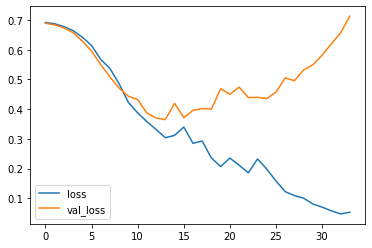

In [32]:
#Plot val_loss and loss 
neural_model_loss = pd.DataFrame(neural_model.history.history)
neural_model_loss.plot()

**Scenario 3:** Adding in DropOut Layers

In [33]:
#Create Sequential instance neural_model
neural_model = Sequential()

#input layer
#Set Dropout rate to 0.4
neural_model.add(Dense(units=90, activation='relu'))
neural_model.add(Dropout(0.4))

#hidden layers
#Set Dropout rate to 0.4
neural_model.add(Dense(units=36, activation='relu'))
neural_model.add(Dropout(0.4))

neural_model.add(Dense(units=15, activation='relu'))
neural_model.add(Dropout(0.4))

neural_model.add(Dense(units=6, activation='relu'))
neural_model.add(Dropout(.4))

neural_model.add(Dense(units=3, activation='relu'))
neural_model.add(Dropout(0.4))

#output layer
neural_model.add(Dense(units=1, activation='sigmoid'))

In [34]:
#Binary classification
neural_model.compile(loss='binary_crossentropy', optimizer='adam')

In [35]:
#Fit the model setting the callbacks argument to early_stop
neural_model.fit(x=X_train,
                y=y_train,
                epochs=200,
                validation_data=(X_test, y_test),
                verbose=1,
                callbacks=[early_stop])

Train on 121 samples, validate on 53 samples
Epoch 1/200
121/121 [==============================] - 1s 7ms/sample - loss: 0.7260 - val_loss: 0.6926
Epoch 2/200
121/121 [==============================] - 0s 376us/sample - loss: 0.6946 - val_loss: 0.6928
Epoch 3/200
121/121 [==============================] - 0s 429us/sample - loss: 0.6991 - val_loss: 0.6928
Epoch 4/200
121/121 [==============================] - 0s 414us/sample - loss: 0.6880 - val_loss: 0.6927
Epoch 5/200
121/121 [==============================] - 0s 376us/sample - loss: 0.7119 - val_loss: 0.6927
Epoch 6/200
121/121 [==============================] - 0s 373us/sample - loss: 0.6865 - val_loss: 0.6927
Epoch 7/200
121/121 [==============================] - 0s 503us/sample - loss: 0.7104 - val_loss: 0.6927
Epoch 8/200
121/121 [==============================] - 0s 378us/sample - loss: 0.6868 - val_loss: 0.6927
Epoch 9/200
121/121 [==============================] - 0s 375us/sample - loss: 0.6912 - val_loss: 0.6928
Epoch 10/200

Epoch 78/200
121/121 [==============================] - 0s 368us/sample - loss: 0.6000 - val_loss: 0.5286
Epoch 79/200
121/121 [==============================] - 0s 364us/sample - loss: 0.6388 - val_loss: 0.5273
Epoch 80/200
121/121 [==============================] - 0s 360us/sample - loss: 0.5709 - val_loss: 0.5243
Epoch 81/200
121/121 [==============================] - 0s 399us/sample - loss: 0.5540 - val_loss: 0.5223
Epoch 82/200
121/121 [==============================] - 0s 363us/sample - loss: 0.5800 - val_loss: 0.5220
Epoch 83/200
121/121 [==============================] - 0s 348us/sample - loss: 0.6027 - val_loss: 0.5230
Epoch 84/200
121/121 [==============================] - 0s 377us/sample - loss: 0.5434 - val_loss: 0.5171
Epoch 85/200
121/121 [==============================] - 0s 353us/sample - loss: 0.5706 - val_loss: 0.5137
Epoch 86/200
121/121 [==============================] - 0s 323us/sample - loss: 0.6385 - val_loss: 0.5049
Epoch 87/200
121/121 [========================

Epoch 155/200
121/121 [==============================] - 0s 362us/sample - loss: 0.4402 - val_loss: 0.4168
Epoch 156/200
121/121 [==============================] - 0s 349us/sample - loss: 0.5080 - val_loss: 0.4130
Epoch 157/200
121/121 [==============================] - 0s 342us/sample - loss: 0.4492 - val_loss: 0.4121
Epoch 158/200
121/121 [==============================] - 0s 351us/sample - loss: 0.5281 - val_loss: 0.4163
Epoch 159/200
121/121 [==============================] - 0s 369us/sample - loss: 0.5163 - val_loss: 0.4161
Epoch 160/200
121/121 [==============================] - 0s 361us/sample - loss: 0.5412 - val_loss: 0.4133
Epoch 161/200
121/121 [==============================] - 0s 359us/sample - loss: 0.5396 - val_loss: 0.4141
Epoch 162/200
121/121 [==============================] - 0s 361us/sample - loss: 0.5261 - val_loss: 0.4164
Epoch 163/200
121/121 [==============================] - 0s 350us/sample - loss: 0.4658 - val_loss: 0.4146
Epoch 164/200
121/121 [==============

<AxesSubplot:>

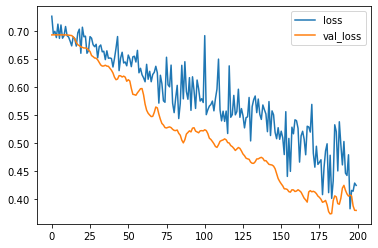

In [36]:
#Plot val_loss and loss 
neural_model_loss = pd.DataFrame(neural_model.history.history)
neural_model_loss.plot()

In [37]:
#Predictions
nn_predictions = (neural_model.predict(X_test)>0.5).astype('int32')

In [38]:
#Model Evaluation 
print(confusion_matrix(y_test, nn_predictions))
print('\n')
print(classification_report(y_test, nn_predictions))

[[22  5]
 [ 6 20]]


              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.80      0.77      0.78        26

    accuracy                           0.79        53
   macro avg       0.79      0.79      0.79        53
weighted avg       0.79      0.79      0.79        53



In [39]:
#Create a DataFrame listing the results of the ML algorithms
print('Model Evaluations - All 5 Tasks')
print('\n')
results_all = {'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Neural Network'],
              'Accuracy': [0.79, 0.89, 0.74, 0.79]}
results_all = pd.DataFrame(results_all)
results_all

Model Evaluations - All 5 Tasks




,Model,Accuracy
0,Logistic Regression,0.79
1,Random Forest,0.89
2,Support Vector Machine,0.74
3,Neural Network,0.79


In [51]:
# Study Results 
print('Model Evaluations from Study - All 5 Tasks')
print('\n')
study_all = {'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Neural Network'],
            'Accuracy Ranges': ['74.66 - 89.06', '83.39 - 93.19', '71.45 - 86.55', '75.17 - 91.11']}
study_all = pd.DataFrame(study_all)
study_all

Model Evaluations from Study - All 5 Tasks




,Model,Accuracy Ranges
0,Logistic Regression,74.66 - 89.06
1,Random Forest,83.39 - 93.19
2,Support Vector Machine,71.45 - 86.55
3,Neural Network,75.17 - 91.11
